# Problem Statement
    
### Context
    
-It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are -not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numeric input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
fraud_df = pd.read_csv("creditcard.csv")

In [3]:
fraud_df.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


In [4]:
# Checking missing values
fraud_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
fraud_df.shape

(284807, 31)

In [6]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

0    284315
1       492
Name: Class, dtype: int64

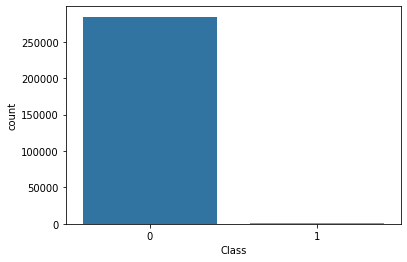

In [7]:
# Analysing Target Variable Class
sns.countplot(fraud_df['Class'])
fraud_df['Class'].value_counts()

In [8]:
# Checking the the Amount  details in both fraud and genuine transactions
fraud = fraud_df[fraud_df['Class'] == 1]
genuine = fraud_df[fraud_df['Class'] == 0]
print("Details of fraud transaction","\n",fraud.Amount.describe(),"\n")
print("Details of genuine transactions","\n",genuine.Amount.describe())

Details of fraud transaction 
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 

Details of genuine transactions 
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


### From the Above analysis it is clear that the average amount in fraud transactions is more

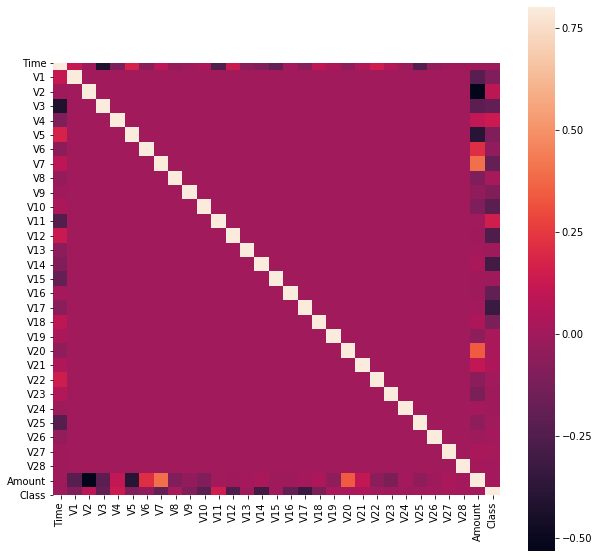

In [9]:
# Plotting Correlation Matrix
corr_matrix = fraud_df.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr_matrix, vmax=.8, square= True)
plt.show()

### From the above analysis it is clear that the features do not correlate to other features, following the correlated features
    - V2 and V5 are negatively correlated with the feature Amount
    - V7 and V20 have some correlation with the feature Amount

In [30]:
# Dividing the X and Y from the dataset
X = fraud_df.drop(['Class'], axis=1)
Y = fraud_df['Class']
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [31]:
# Dividing the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.20, random_state = 42)

In [32]:
# Creating a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

#prediction
yPred = rfc.predict(xTest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Evaluating the model by calculating Accuracy, Precision, Recall and F1-Score

In [33]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

acc = accuracy_score(yTest, yPred)
print("Accuracy = {}".format(acc))

prec = precision_score(yTest, yPred)
print("Precision = {}".format(prec))

rec = recall_score(yTest, yPred)
print("Recall = {}".format(rec))

f1 = f1_score(yTest, yPred)
print("F1-Score = {}".format(f1))

Accuracy = 0.9995786664794073
Precision = 0.9743589743589743
Recall = 0.7755102040816326
F1-Score = 0.8636363636363635


### Visualizing the confusion matrix

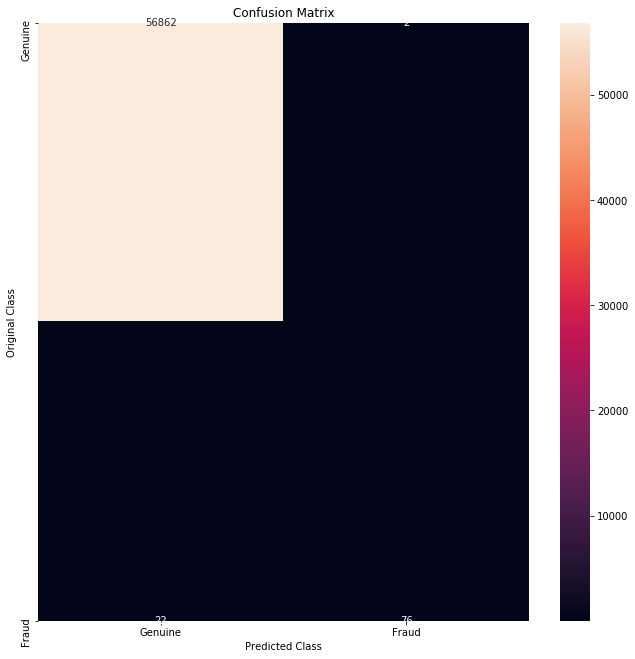

In [34]:
LABELS = ['Genuine','Fraud']
con_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(11,11))
sns.heatmap(con_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.ylabel("Original Class")
plt.xlabel("Predicted Class")
plt.show()